# MATH 189 Project

Names: Kai Breese, Hunter Brownell, Yishan Cai <br>
Exploring Health-Related Factors Associated with Diabetes in the United States

## Setup

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import pearsonr
import sklearn.metrics as metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor

import lxml

def standardize(X):
    return (X - X.mean()) / X.std()

## Porblem Statment

Diabetes is an epidemic in the United States, with its prevalence steadily increasing and making it a major public health concern. Our goal with this project is to better understand the health factors that play the biggest role in determining if someone will develop diabetes. To achieve this, we are using a comprehensive database provided by UCI, which includes both physical and mental health data on thousands of people. By analyzing these healthcare statistics and lifestyle survey information, we aim to identify the key health-related factors that contribute to the development and progression of diabetes. This research is essential for developing targeted interventions and risk assessment strategies to address the growing diabetes epidemic.

## Data

We plan to acquire data from the CDC Diabetes Health Indicators Dataset, which is available at the UCI Machine Learning Repository. This dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabete, with core features BMI, Smoker, Stroke, age, making it ideal for our analysis.

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

The features with their description are the following:
1. `Diabetes_binary`: 
    * Target variable indicating diabetes or prediabetes (0 = no diabetes, 1 = prediabetes or diabetes)
2. `HighBP`: 
    * Indicates high blood pressure (0 = no high blood pressure, 1 = high blood pressure)
4. `HighChol`: 
    * Indicates high cholesterol (0 = no high cholesterol, 1 = high cholesterol)
5. `CholCheck`: 
    * Indicates whether cholesterol was checked in the last 5 years (0 = no cholesterol check, 1 = cholesterol check in 5 years)
6. `BMI`:
    * Body Mass Index, a discrete quantitative measure
7. `Smoker`: 
    * Indicates smoking status (0 = non-smoker, 1 = smoker)
8. `Stroke`:
    * Indicates history of stroke (0 = no stroke, 1 = had a stroke)
9. `HeartDiseaseorAttack`:
    * Indicates history of coronary heart disease (CHD) or myocardial infarction (MI) (0 = no history, 1 = history present)
10. `PhysActivity`: 
    * Indicates physical activity in the past 30 days excluding job-related activity (0 = no physical activity, 1 = engaged in physical activity)
11. `Fruits`: 
    * Indicates daily fruit consumption (0 = no daily fruit consumption, 1 = daily fruit consumption)
12. `Veggies`: 
    * Indicates daily vegetable consumption (0 = no daily vegetable consumption, 1 = daily vegetable consumption)
13. `HvyAlcoholConsump`:
    * Indicates heavy alcohol consumption (0 = no heavy alcohol consumption, 1 = heavy alcohol consumption)
14. `AnyHealthcare`: 
    * Indicates presence of any healthcare coverage (0 = no healthcare coverage, 1 = healthcare coverage present)
15. `NoDocbcCost`: 
    * Indicates inability to see a doctor due to cost in the past 12 months (0 = did not face this issue, 1 = faced this issue)	
16. `GenHlth`: 
    * Self-rated general health on a scale from excellent to poor (1 = excellent, 5 = poor)
17. `MentHlth`:
    * Number of days in the past 30 days with poor mental health
18. `PhysHlth`: 
    * Number of days in the past 30 days with poor physical health
19. `DiffWalk`: 
    * Indicates serious difficulty walking or climbing stairs (0 = no difficulty, 1 = difficulty present)
20. `Sex`: 
    * Gender (0 = female, 1 = male)
21. `Age`: 
    * Age category (1 = 18-24, ..., 13 = 80 or older)
22. `Education`: 
    * ordinal: 6-level education category (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate))
23. `Income`: 
    * ordinal: 8-level Income scale (1 = less than 10,000, 5 = less than 35,000, 8 = 75,000 or more)

Fistly, we load the dataset and display the first 5 rows of the dataset.

In [2]:
df = pd.read_csv("diabetes.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [4]:
df.shape

(253680, 22)

Then we convert categorical variables in dataframe

In [5]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [6]:
categorical_vars = [col for col in df.columns if df[col].nunique() == 2]
numerical_vars = [col for col in df.columns if col not in categorical_vars]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

## Exploratory data analysis

**Univariate Analysis**

In the univariate analysis, we analyze the distribution of all variables independently.

Firstly, let's check the descriptive statistics of the numerical variables.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


The data has already been binned into categories so the values in the data do not represent the real-world values. An age value of 1 does not correspond to a 1-year old but rather the first bin which is 18-24 years old.

Now let's look at histograms for these variables to help visualize the distributions.

In [9]:
# Creating a dictionary for more meaningful labels for discrete non-binary columns
discrete_label_dict = {
    'GenHlth': {
        1: 'Excellent',
        2: 'Very Good',
        3: 'Good',
        4: 'Fair',
        5: 'Poor'
    },
    'Age': {
        1: '18-24',
        2: '25-29',
        3: '30-34',
        4: '35-39',
        5: '40-44',
        6: '45-49',
        7: '50-54',
        8: '55-59',
        9: '60-64',
        10: '65-69',
        11: '70-74',
        12: '75-79',
        13: '80 or older'
    },
    'Education': {
        1: 'None',
        2: 'Elementary',
        3: 'Some high school',
        4: 'High school graduate',
        5: 'Some college',
        6: 'College graduate'
    },
    'Income': {
        1: '< $10,000',
        2: '< $15,000',
        3: '< $20,000',
        4: '< $25,000',
        5: '< $35,000',
        6: '< $50,000',
        7: '< $75,000',
        8: '> $75,000'
    }
}

In [10]:
sns.set_style("whitegrid")

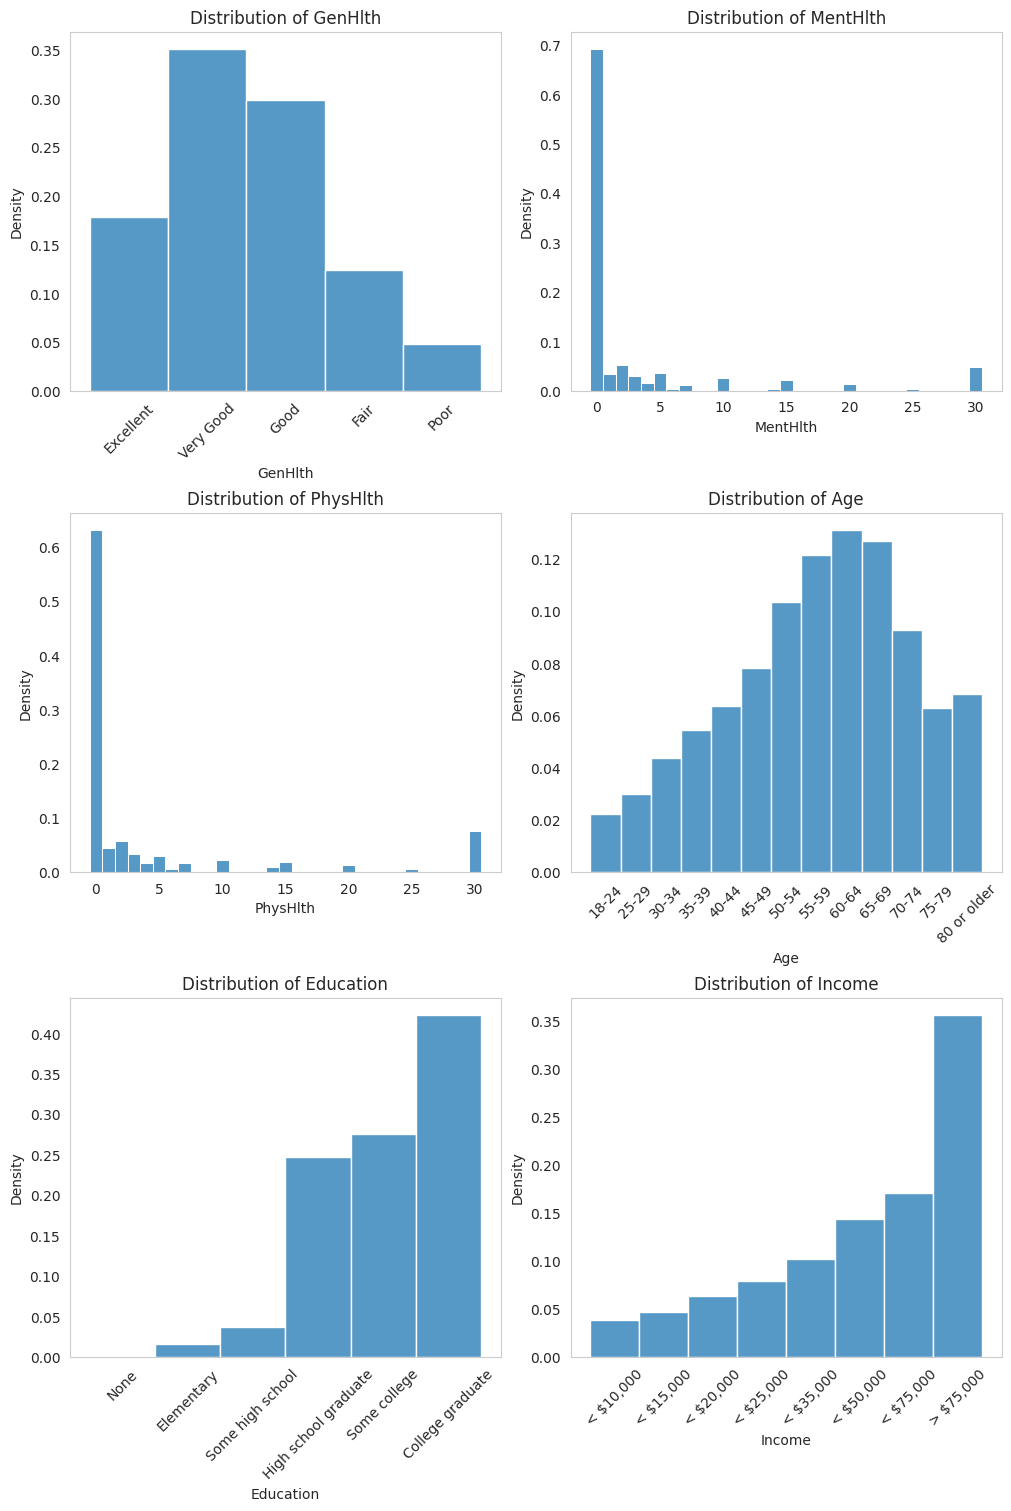

In [11]:
# Define a function to create a histogram with modified labels without modifying the original dataframe
def create_histogram_with_labels(df, column, label_dict, ax):
    temp_df = df.copy()
    if column in label_dict:
        labels = label_dict[column]
        temp_df[column] = temp_df[column].map(labels)
        temp_df[column] = pd.Categorical(temp_df[column], categories=labels.values(), ordered=True)
        ax.tick_params(axis='x', rotation=45)
    sns.histplot(temp_df, x=column, discrete=True, ax=ax, element='bars', stat='density')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.grid(False)  # Remove gridlines
    
# Setting up the grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15), constrained_layout=True)
axes = axes.flatten()  # Flatten the array to iterate easily

# Creating overlaid histograms for each numerical variable with modified labels
for ax, var in zip(axes, numerical_vars[1:]):
    create_histogram_with_labels(df, var, discrete_label_dict, ax)

plt.show()

It is important to note here that the health related variables are self-reported answers, not objective measurements. This means the data does not necessarily represent reality with a high level of accuracy. Even if someone reports feeling extremely healthy, they might have hidden underlying conditions and vice-versa. We can see the distribution of general health is skewed right with a majority of people reporting feeling "very good". The values in the `MenlHlth` and `PhysHlth` columns refer to how many days out of the past month an individual reported feeling "not good" about that aspect. This distribution is interesting, with a majority reporting 0 days (always feeling good) which slowly tapers off over the next 5 days, and then the distribution appears mostly uniform until 30 days where there is a significant spike. The distribution of age looks relatively normal with a mean around 60 years old. For education and income, the number of people in each category increases with the level of the category (higher education/income) which could be due to how to curators of the original dataset chose to select candidates.

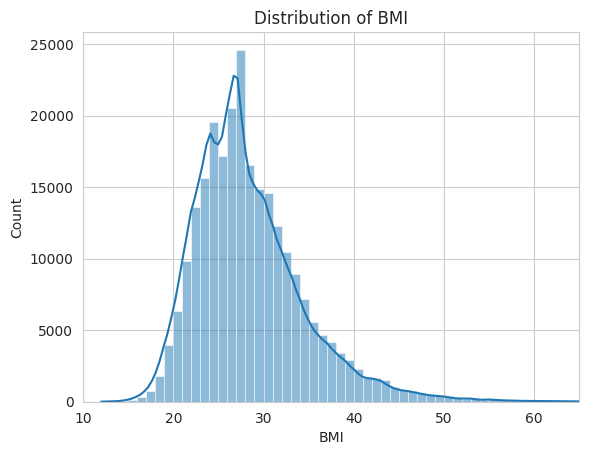

In [12]:
# Plot histograms for BMI, MentHlth, PhysHlth, and Age
fig = sns.histplot(df['BMI'], kde=True, binwidth=1, binrange=(10,65))
fig.set_xlim(10,65)
fig.set_title('Distribution of BMI')

plt.show()

The distribution of BMI also appears to be normal, with a mean around 27. This seems pretty typical and is expected from a random selection of individuals. The distribution has a slight right skew indicating the most extreme values lay to the right of the center (overweight) with most observations being to the left of center.

**Bivariate Analysis**

Next we will begin exploring how many of the variables relate to the target column (Diabetes) to see which ones might be valuable in creating a predictive model and to validate if the data aligns with common sense reasoning about diabetes. The data contains only two types of variables, binary and numerical. We start by finding the binary variables where the value has a significant impact on the ratio of diabetics (percentage difference greater than 0.075). The columns are: 

In [13]:
categorical_vars.remove('Diabetes_binary')

In [14]:
# Define the function to find binary columns with significant differences in diabetes proportions
def find_significant_binary_columns(df, target_col, threshold=0.1):
    significant_columns = []
    for col in categorical_vars:
        # Calculate the proportion of people with diabetes for each unique value in the binary column
        proportions = df.groupby(col)[target_col].mean()
        difference = abs(proportions[1] - proportions[0])
        
        # Check if the difference is greater than the threshold
        if difference > threshold:
            significant_columns.append(col)
    
    return significant_columns

# Using the function to find significant binary columns in the dataset
significant_columns = find_significant_binary_columns(df, 'Diabetes_binary', threshold=0.065)
significant_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'DiffWalk']

Let's take a look at some mosaic charts of how these binary variables affect the proportion of diabetic people within that category. For understanding these plots, the left and right columns represent whether the binary variable is true or false, and the rows correspond to whether a person has diabetes or not. The size of each tile represents the overall proportion of people to which the given condition applies out of the entire dataset. We are, generally speaking, looking for plots where the height of the boxes which represent a person having diabetes is significantly different between the left and right sides. This would mean the variable we are analyzing has a strong correlation with diabetes.

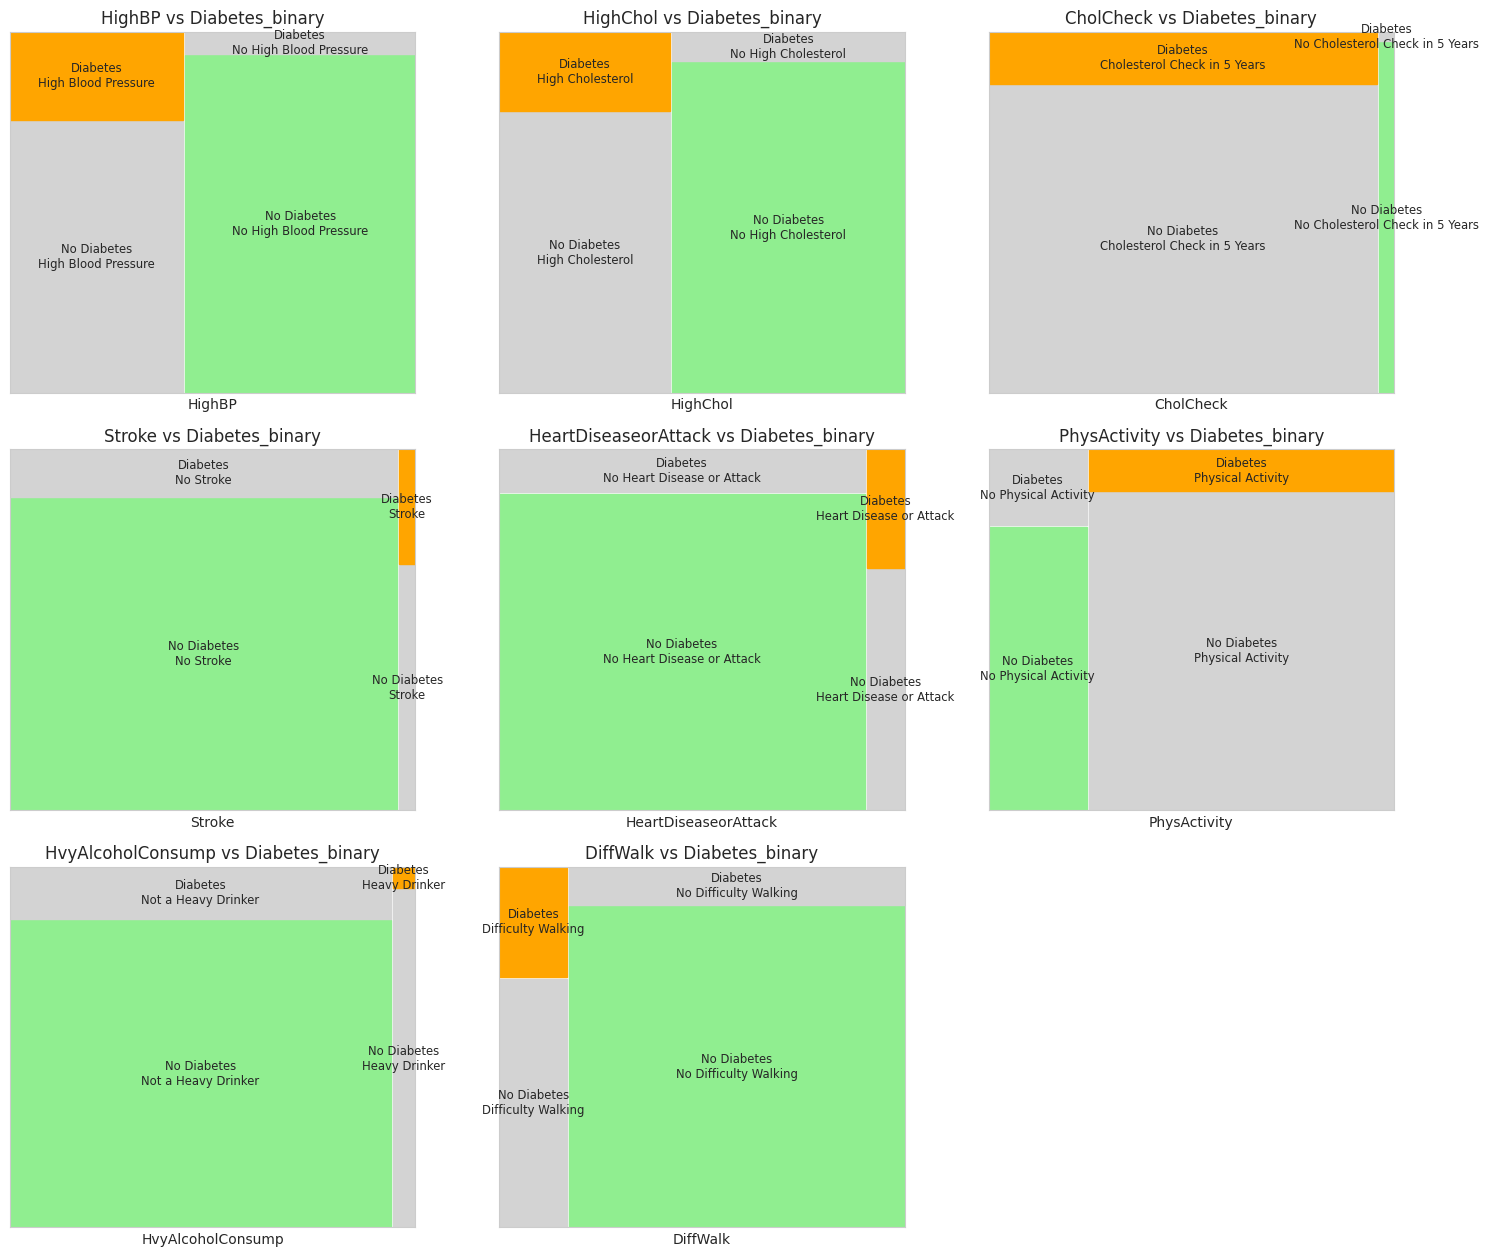

In [15]:
# Creating a dictionary for more meaningful labels
label_dict = {
    'Diabetes_binary': {0: 'No Diabetes', 1: 'Diabetes'},
    'HighBP': {0: 'No High Blood Pressure', 1: 'High Blood Pressure'},
    'HighChol': {0: 'No High Cholesterol', 1: 'High Cholesterol'},
    'CholCheck': {0: 'No Cholesterol Check in 5 Years', 1: 'Cholesterol Check in 5 Years'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Stroke': {0: 'No Stroke', 1: 'Stroke'},
    'HeartDiseaseorAttack': {0: 'No Heart Disease or Attack', 1: 'Heart Disease or Attack'},
    'PhysActivity': {0: 'No Physical Activity', 1: 'Physical Activity'},
    'Fruits': {0: 'Does Not Consume Fruit Daily', 1: 'Consumes Fruit Daily'},
    'Veggies': {0: 'Does Not Consume Vegetables Daily', 1: 'Consumes Vegetables Daily'},
    'HvyAlcoholConsump': {0: 'Not a Heavy Drinker', 1: 'Heavy Drinker'},
    'AnyHealthcare': {0: 'No Healthcare Coverage', 1: 'Has Healthcare Coverage'},
    'NoDocbcCost': {0: 'Could See Doctor', 1: 'Could Not See Doctor Due to Cost'},
    'DiffWalk': {0: 'No Difficulty Walking', 1: 'Difficulty Walking'},
    'Sex': {0: 'Female', 1: 'Male'}
}

def labelizer(key, col_name):
    diabetes_label = label_dict['Diabetes_binary'][int(key[1])]
    col_label = label_dict[col_name][int(key[0])]
    return f"{diabetes_label}\n{col_label}"

def colorizer(key):
    if key[1] == '1' and key[0] == '1':
        return 'orange'
    elif key[1] == '0' and key[0] == '0':
        return 'lightgreen'
    else:
        return 'lightgray'

# Creating multiple mosaic plots in a grid layout
fig, axs = plt.subplots(len(categorical_vars) // 3 + len(categorical_vars) % 3, 3, figsize=(15, 25))
axs = axs.flatten()

for i, col in enumerate(significant_columns):
    mosaic(df, [col, 'Diabetes_binary'], 
           title=f'{col} vs Diabetes_binary', 
           labelizer=lambda key: labelizer(key, col), 
           properties=lambda key: {'color': colorizer(key)},
           axes_label=False,
           ax=axs[i])
    axs[i].set_xlabel(col)
    # axs[i].set_ylabel('Diabetes_binary')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Since we preselected variables where we already knew there would be a larger difference in the ratio of diabetics based on the values in the columns, all of these charts clearly display that. However, it is not accurate to therefore say a given variable is an indicator, or cause, of diabetes. For example, we can see that heavy drinkers have a lower incidence of diabetes than non-heavy drinkers, and people who have not gotten a cholesterol check in the past 5 years also have a lower incidence rate. However, most reasonable people would not suggest never having your cholesterol checked and becoming an alcoholic is an effective way to prevent diabetes. When understanding these charts, it's critical to note that the target variable could be causing results in the variables we are analyzing just as much as the opposite is true. People with diabetes are much more likely to be aware of their health conditions and therefore more likely to have cholesterol checked as part of their medical care. The people who don't get their cholesterol checked may be feeling extremely healthy and not feel the need for that type of test and are also much less likely to have diabetes because of their healthy status. While these variables could prove to be powerful indicators, we must separate the concept of an indicator from causation.  

Next, let's compare the distributions of the numerical variables between those with and without diabetes, starting with BMI.

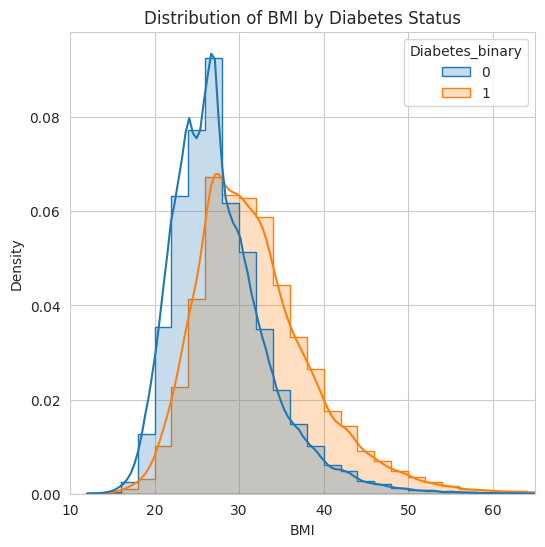

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(df, x='BMI', bins=60, binwidth=2, hue='Diabetes_binary', hue_order=[0, 1], ax=ax, fill=True, element='step', kde=True, stat='density', multiple='layer', common_norm=False)
ax.set_title('Distribution of BMI by Diabetes Status')
ax.set_xlabel('BMI')
ax.set_xlim(10,65)
ax.set_ylabel('Density')

plt.show()

We can see the BMI of individuals with diabetes is on average higher than those without. This aligns with what one would expect given that most diabetics are type-2 and the inheretic dietary nature of the condition. In many cases, excessive consumption can lead to both weight gain and diabetes. This histogram is normalized within the diabetes variable and not commonly to the overall dataset. This is done so we can easily compare the distributions since the proportion of people with diabetes is relatively low compared to the overall population which makes the histograms appear on different scales. It is interesting to note that the non-diabetic population seems to have a more tightly clustered distribution of BMIs.

If we compare the mean values from these numerical columns between the two groups in the target column, we again notice some consistent trends. On average, diabetics tend to be heavier, feel less good about their health (overall, mental, and physical), be older, less educated, and make less money than their non-diabetic counterparts. Again, all of these results seem fairly consistent with common sense reasoning and what we can assume about diabetes. I think it is interesting to note the differences in education and income. We first need to determine if the difference in means between the groups is actually statistically significant before making definitive conclusions, but in the the case of income, one might speculate the lower income population has lower access to healthy foods and tends to buy less-healthy, high-sugar foods as they are often cheaper in America (where the data was collected) which could be a contributor to diabetes.

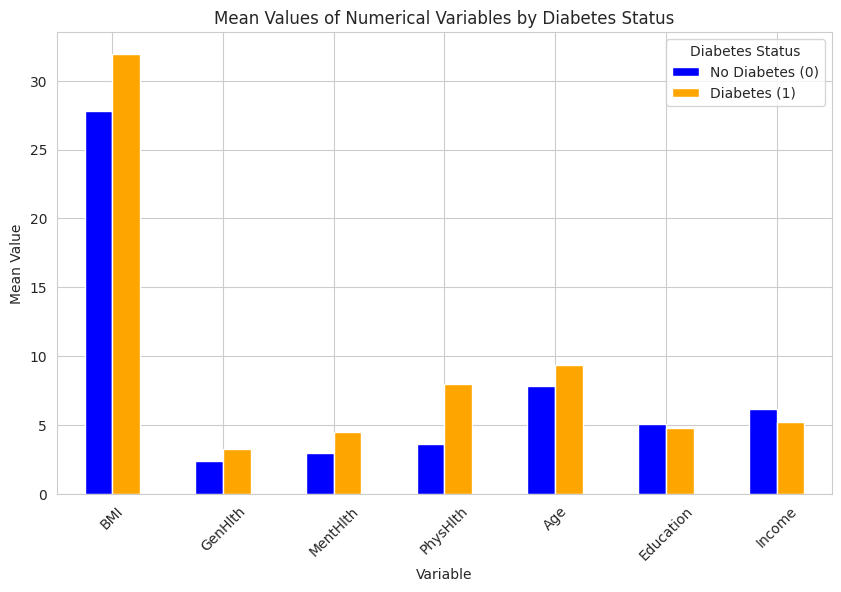

In [17]:
# Calculate the mean of each numerical variable for each diabetes status
means = df.groupby('Diabetes_binary')[numerical_vars].mean()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
means.T.plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_title('Mean Values of Numerical Variables by Diabetes Status')
ax.set_xlabel('Variable')
ax.set_ylabel('Mean Value')
ax.set_xticklabels(numerical_vars, rotation=45)
ax.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Diabetes (1)'])

plt.show()

Next, we will dive into the differences in the distributions of all of these variables between the groups.

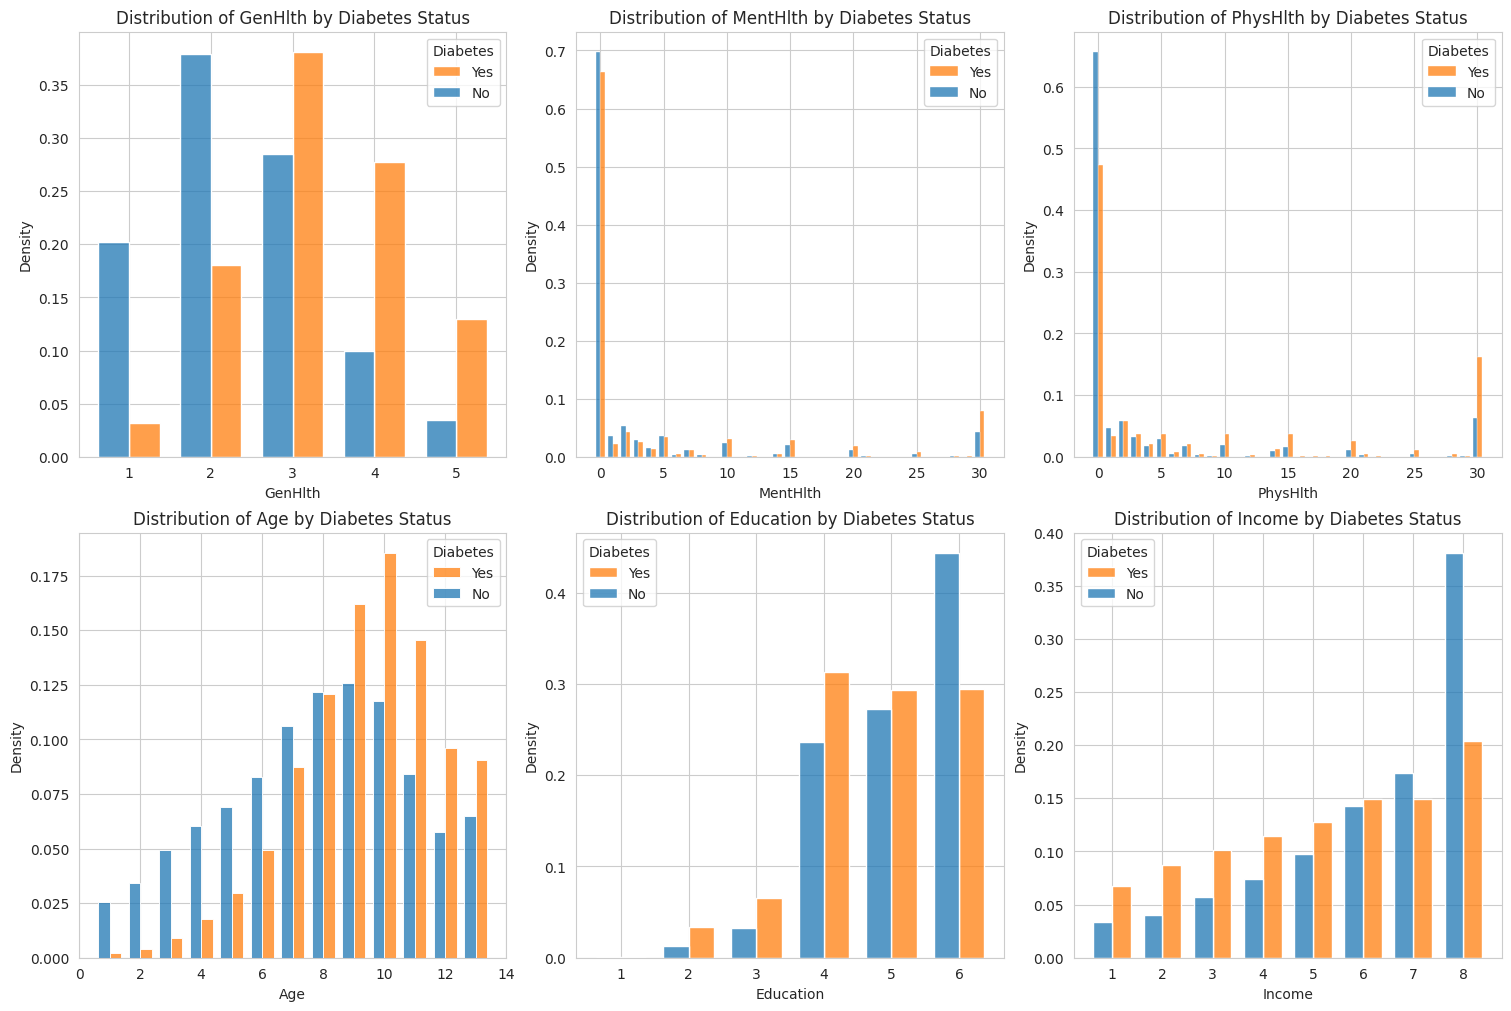

In [18]:
# Setting up the grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), constrained_layout=True)
axes = axes.flatten()  # Flatten the array to iterate easily

# Creating overlaid histograms for each numerical variable
for ax, var in zip(axes, numerical_vars[1:]):
    sns.histplot(df, x=var, discrete=True, hue='Diabetes_binary', hue_order=[0,1], ax=ax, element='bars', stat='density', multiple='dodge', common_norm=False, shrink=0.75)
    ax.set_title(f'Distribution of {var} by Diabetes Status')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend(title='Diabetes', labels=['Yes', 'No'])
    
# Remove unused axes
for i in range(len(numerical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.show()

For the self-reported health related variables, the results are not surprising given the initial discoveries from looking at the means of these variables. Diabetics tend to report feeling less healthy in all aspects for more days out of the month than non-diabetics. The difference in most noteable at the extreme ends of the values these variables take on. A much smaller proportion of diabetics reported feeling bad about their physical health 0 days out of a month than the other group, while over double the proportion from the diabetic group report feeling bad every single day. The age comparison histogram also shows us that diabetics tend to be older, but the distribution is not just shifted but the shape is also narrower than the healthy group. This indicates diabetes is relatively rare among younger people and has a high onset rate later in life. The education distribution is particularly interesting, we see that a majority of diabetics from this dataset have a high school degree or equivalent as their highest level of education, and the proportion with less and more education are higher and lower respectively than the healthy group. It is also interesting to note that overall and in the healthy population, the trend in this dataset in terms of education is purely upwards, with each higher group representing a relatively larger proportion of the population, but within the diabetic group the proportion in higher education actually decreases after a high school degree or equivalent. Among the income status distributions, we see that the trend is similar between both groups in that more people tend to make increasing amounts of money, but among diabetics the distribution is much flatter compared to the overall. Particularly surprising is the high income bin (greater than $75,000/yr) where the proportion in the healthy group is roughly double the previous bin, in the diabetic group it is still more than the previous bin but only by a marginal amount. The proportions in lower income bins are also higher than the healthy group. 

## Inferential Analysis

## Hypothesis Test 1

For my hypothesis test, I am hypothesizing that various columns will have adverse effects on whether or not someone will have diabetes. I am going to run 3 seperate t-tests in order to test if someones BMI, mental health, or physical health can indicate whether someone is more or less likely to get diabetes.

**H0**: The mean of the values in 'BMI', 'MentHlth' and 'PhysHlth' columns will be roughly the same for patients with diabetes and those without.

**H1**: The mean of the values in the 'BMI', 'MentHlth' and 'PhysHlth' columns will be significantly different for the patients with diabetes compared to patients without diabetes.

In [19]:
var = ['BMI', 'MentHlth', 'PhysHlth']

t_results = {}

for var in var:
    group1 = df[df['Diabetes_binary'] == 0][var]
    group2 = df[df['Diabetes_binary'] == 1][var]
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True, permutations=100, alternative='less')
    t_results[var] = p_val


print("T-Test Results:")
for var, p_val in t_results.items():
    print(f"{var}: p-value = {p_val}")

T-Test Results:
BMI: p-value = 0.009900990099009901
MentHlth: p-value = 0.009900990099009901
PhysHlth: p-value = 0.009900990099009901


**Results**

According the the p-values, BMI, physical health and mental health are all strong indicators of a patients alikelihood to end up with diabetes. All of the columns showed a p-value of 0 which indicates that there is very significant differences in their values for patients with diabetes compared to those without. 


Upon further analysis, it may appear that columns such as the mental health columns might not directly effect whether or not a patient has diabetes. Instead, it is likely that mental health is conditionally indepedent from diabetes, given other factors such as physical health or BMI.

## Hypothesis Test 2

For the second hypothesis test, I am going to test the validity of the first hypothesis test to see if mental health really does cause diabetes or both are caused by physical health. I am going to find the correlation between mental and physical health by using a linear regression model between mental health and physical health values, then I will fit a linear regression model for diabetes and physical health. Finally I will find the correlation between the residuals to conclude whether or not there is conditional independence.

**H0**: Mental health and diabetes are conditionally independent given phyiscal health.

**H1**: Mental health and diabetes are not conditionally independent given phyiscal health.

In [20]:
X1 = sm.add_constant(df['PhysHlth'])
model1 = sm.OLS(df['MentHlth'], X1).fit()
residuals_menthlth = model1.resid

X2 = sm.add_constant(df['PhysHlth'])
model2 = sm.OLS(df['Diabetes_binary'], X2).fit()
residuals_diabetes = model2.resid

correlation, p_value = pearsonr(residuals_menthlth, residuals_diabetes)

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.009470046225059463
P-value: 1.84382360788712e-06


**Results**

The correlation was not strong enough and therefore we must reject the null hypothesis. Mental health and diabetes are NOT conditionally independent given phyiscal health.

## Logistic Regression Model

The relationship is not apparent in scatterplot visualization, it is necessary to assess the results of a logistic regression to determine whether there is a statistically significant relationship between variables and diabetes.

In the modeling phase, we use logistic regression to build a predictive model for diabetes. The model formula is created with `Diabetes_binary` as the response variable and other variables as predictors.

In [21]:
df = pd.read_csv("diabetes.csv")
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                    'NoDocbcCost', 'DiffWalk', 'Sex']

for var in categorical_vars:
    df[var] = df[var].astype('category')

In [22]:
response = 'Diabetes_binary'
covariates = df.columns.drop(response)
formula = f"{response} ~ {' + '.join(covariates)}"
formula

'Diabetes_binary ~ Unnamed: 0 + HighBP + HighChol + CholCheck + BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income'

And here is our baseline logistic regression model

In [23]:
model = smf.logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.319662
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253658
Method:                           MLE   Df Model:                           21
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.2083
Time:                        05:39:58   Log-Likelihood:                -81092.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.8362      0.094    -83.760      0.000      -8.

Using a significance level of 5%, we identified the covariates that exhibit statistically significant associations with the response variable, `Diabetes_binary`, based on their corresponding p-values from the logistic regression model analysis.

In [24]:
alpha = 0.05
summary_table = model.summary().tables[1].as_html()
summary_df = pd.read_html(summary_table, header=0, index_col=0)[0]
p_values = summary_df['P>|z|']

stats_sig = []

for i in range(len(p_values)):
    if p_values.values[i] < alpha:
        stats_sig.append(p_values.index[i])

stats_sig

['Intercept',
 'HighBP[T.1]',
 'HighChol[T.1]',
 'CholCheck[T.1]',
 'Stroke[T.1]',
 'HeartDiseaseorAttack[T.1]',
 'PhysActivity[T.1]',
 'Fruits[T.1]',
 'Veggies[T.1]',
 'HvyAlcoholConsump[T.1]',
 'AnyHealthcare[T.1]',
 'DiffWalk[T.1]',
 'Sex[T.1]',
 'BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Age',
 'Education',
 'Income']

After analyzing the data with a significance level set at 5%, we discovered that all covariates, with the exception of `Smoker` and `NoDocbcCost`, are statistically significant predictors of `Diabetes_binary`. Consequently, our next step involves constructing a revised logistic regression model that includes only these statistically significant covariates. This new model will enable us to focus exclusively on the variables that have demonstrated a significant association with the outcome variable, streamlining our analysis for improved accuracy and relevance.

In [25]:
endog = df['Diabetes_binary']
exog = sm.add_constant(df.drop(columns=['Diabetes_binary', 'Smoker', 'NoDocbcCost']))

model2 = sm.Logit(endog, exog)
result = model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.319663
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253659
Method:                           MLE   Df Model:                           20
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.2083
Time:                        05:40:27   Log-Likelihood:                -81092.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.8418      0.093    -84.306      0.000      -8.024      -7.659

Then, we revised logistic regression model to incorporate interaction terms to capture potential nonlinear relationships and interactions between variables. The model equation includes terms such as Age multiplied by HighBP, Age multiplied by HighChol, Age multiplied by BMI, BMI multiplied by PhysActivity, as well as individual terms for CholCheck, Stroke, HvyAlcoholConsump, HeartDiseaseorAttack, Fruits, Veggies, AnyHealthcare, MentHlth, GenHlth multiplied by PhysHlth, DiffWalk, Sex, Education, and Income.

In [26]:
lr_new_formula = 'Diabetes_binary ~ Age * HighBP + Age * HighChol + Age * BMI + BMI * PhysActivity + CholCheck + Stroke + HvyAlcoholConsump + HeartDiseaseorAttack + Fruits + Veggies + AnyHealthcare + MentHlth + GenHlth * PhysHlth + DiffWalk + Sex + Education + Income'
model3 = smf.logit(lr_new_formula, data=df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.317354
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253655
Method:                           MLE   Df Model:                           24
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.2140
Time:                        05:40:58   Log-Likelihood:                -80506.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.2647      0.134    -54.050      0.000      -7.

After fitting the expanded logistic regression model, which includes interaction terms, we observed successful optimization with a current function value of 0.317354 and 8 iterations. The model's pseudo R-squared value remains consistent at 0.214, indicating that the model still explains about 21.4% of the variability in the response variable, `Diabetes_binary`.

When interpreting each coefficient associated with the covariates in the new logistic regression model (`model3`), we gain insights into the impact of various factors on the log-odds of diabetes, providing a comprehensive understanding of how each predictor contributes to the likelihood of the outcome variable.

**Main effects**: 
1. Interpretation of `Intercept`: This is the log-odds of having diabetes when all other variables are zero. Without considering any risk factors or demographic variables, the log-odds of having diabetes are very low. 
2. Interpretation of `HighBP[T.1]`: Having high blood pressure increases the log-odds of diabetes by 1.2826 compared to not having high blood pressure, holding all other variables constant.
3. Interpretation of `HighChol[T.1]`: Having high cholesterol increases the log-odds of diabetes by 1.3716 compared to not having high cholesterol, holding all other variables constant.
4. Interpretation of `PhysActivity[T.1]`: Engaging in physical activity decreases the log-odds of diabetes by 0.2353 compared to not engaging in physical activity, holding all other variables constant.
5. Interpretation of `CholCheck[T.1]`: Having had a cholesterol check in 5 years increases the log-odds of diabetes by 1.2249 compared to not having a cholesterol check, holding all other variables constant.
6. Interpretation of `Stroke[T.1]`: Having had a stroke increases the log-odds of diabetes by 0.1584 compared to not having had a stroke, holding all other variables constant.
7. Interpretation of `HvyAlcoholConsump[T.1]`: Being a heavy alcohol consumer decreases the log-odds of diabetes by 0.7782 compared to not being a heavy alcohol consumer, holding all other variables constant.
8. Interpretation of `HeartDiseaseorAttack[T.1]`: Having had heart disease or a heart attack increases the log-odds of diabetes by 0.2459 compared to not having had heart disease or a heart attack, holding all other variables constant.
9. Interpretation of `Fruits[T.1]`: Consuming fruits daily decreases the log-odds of diabetes by 0.0407 compared to not consuming fruits daily, holding all other variables constant.
10. Interpretation of `Veggies[T.1]`: Consuming vegetables daily decreases the log-odds of diabetes by 0.0307 compared to not consuming vegetables daily, holding all other variables constant.
11. Interpretation of `AnyHealthcare[T.1]`: Having any healthcare coverage increases the log-odds of diabetes by 0.0822 compared to not having healthcare coverage, holding all other variables constant.
12. Interpretation of `DiffWalk[T.1]`: Having difficulty walking increases the log-odds of diabetes by 0.1042 compared to not having difficulty walking, holding all other variables constant.
13. Interpretation of `Sex[T.1]`: Being male increases the log-odds of diabetes by 0.2391 compared to being female, holding all other variables constant.
14. Interpretation of `Age`: Each unit increase in the age category increases the log-odds of diabetes by 0.0441, holding all other variables constant.
15. Interpretation of `BMI` :Each unit increase in BMI increases the log-odds of diabetes by 0.0114, holding all other variables constant.
16. Interpretation of `MentHlth`: Each additional day of poor mental health in the past 30 days decreases the log-odds of diabetes by 0.0030, holding all other variables constant.
17. Interpretation of `GenHlth` :Each unit increase in the general health score (where higher values indicate worse health) increases the log-odds of diabetes by 0.6145, holding all other variables constant.
18. Interpretation of `PhysHlth`: Each additional day of poor physical health in the past 30 days increases the log-odds of diabetes by 0.0399, holding all other variables constant.
19. Interpretation of `Education`: Each unit increase in education level decreases the log-odds of diabetes by 0.0240, holding all other variables constant.
20. Interpretation of `Income`: Each unit increase in income level decreases the log-odds of diabetes by 0.0526, holding all other variables constant.

**Regarding interaction effects:**:
1. Interpretation of `Age:HighBP[T.1]`: The effect of age on the log-odds of diabetes is moderated by having high blood pressure. Specifically, each unit increase in age combined with having high blood pressure decreases the log-odds of diabetes by an additional 0.0610.

2. Interpretation of `Age:HighChol[T.1]`: The effect of age on the log-odds of diabetes is moderated by having high cholesterol. Specifically, each unit increase in age combined with having high cholesterol decreases the log-odds of diabetes by an additional 0.0881.

3. Interpretation of `BMI:PhysActivity[T.1]`: The effect of BMI on the log-odds of diabetes is moderated by physical activity. Specifically, each unit increase in BMI combined with engaging in physical activity increases the log-odds of diabetes by an additional 0.0062.

19. Interpretation of `Age:BMI`: The effect of BMI on the log-odds of diabetes is further moderated by age. Specifically, each unit increase in BMI combined with each unit increase in age increases the log-odds of diabetes by an additional 0.0054.

23. Interpretation of `GenHlth:PhysHlth`: The effect of general health on the log-odds of diabetes is moderated by physical health. Specifically, each unit increase in the general health score combined with each additional day of poor physical health decreases the log-odds of diabetes by an additional 0.0124.

In conclusion, the logistic regression model (`model3`) with interaction terms provides a detailed understanding of how various factors influence the log-odds of diabetes, shedding light on the complex interplay between demographic, lifestyle, and health-related variables. We will now evaluate the model's performance, assess its assumptions, and explore any potential areas for improvement or further investigation in our model diagnostics section.

### Model Diagnostics

After conducting model diagnostics for model3, which includes assessing fitted values, residuals, confusion matrix, classification accuracy, ROC curve, and AUC score, several key insights into the model's performance and predictive ability have been revealed. 

The scatter plot of residuals demonstrates a random distribution around zero, indicating that the model's errors are unbiased and consistent across the range of predicted values.

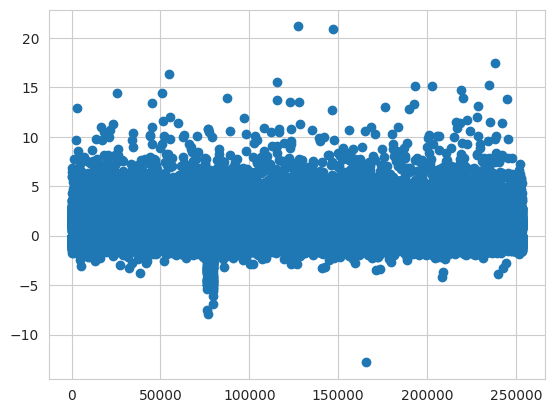

In [27]:
residuals = model3.resid_pearson
plt.scatter(range(len(residuals)), residuals)

> confusion matrix and classification accuracy of `model3`.

The confusion matrix, derived from model3, provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions, contributing to a comprehensive evaluation of the model's predictive performance. The accuracy of 0.8636 indicates that this logistic regression model correctly classifies approximately 86.47% of the instances.

In [28]:
c_matrix = model3.pred_table(threshold=0.5)
c_matrix

array([[213914.,   4420.],
       [ 29899.,   5447.]])

In [29]:
accuracy = (c_matrix[0,0] + c_matrix[1,1]) / c_matrix.sum()
accuracy

0.8647153894670451

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between the true positive rate and the false positive rate for every possible cut-off value. By examining specific thresholds in the ROC curve, such as the threshold around 0.1, we can gain further insights into the model's performance at different decision points. An AUC score of 0.8247 suggests that the model is fairly accurate, and it has a good ability to discriminate between the positive and negative classes. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


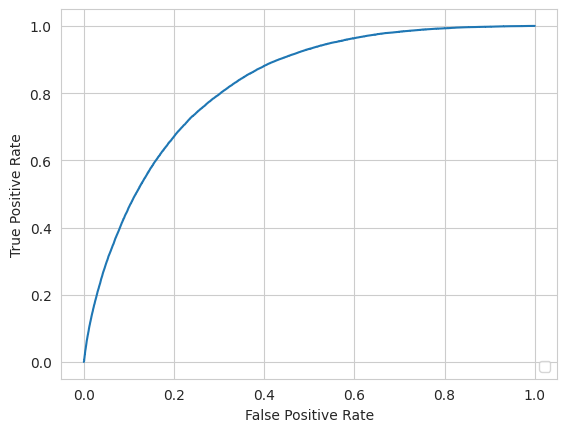

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(df['Diabetes_binary'], model3.predict(df))

indx = (0.1 - 5e-3 <= thresholds) * (thresholds <= 0.1 + 5e-3)
tpr[indx], fpr[indx],  thresholds[indx]

metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [31]:
metrics.roc_auc_score(df['Diabetes_binary'], model3.predict(df))

0.8247132394294344

## Limitations and Shortcoming

This model discussed above demonstrates several strengths in its ability to predict diabetes outcomes based on a range of factors such as demographics, lifestyle choices, and health indicators. However, it's crucial to recognize the limitations and potential shortcomings that could affect the model's performance and reliability.

Imbalanced data poses a significant challenge to our project. Since the dataset used to train the model is highly imbalanced, where the diabetes-negative cases significantly outnumbers the other, the model may exhibit bias toward the majority class. This can result in lower performance metrics, particularly for predicting minority classes, which is the diabetes-positive cases. In the future, we may use techniques such as resampling methods or adjusting class weights during model training to mitigate this imbalance issue.

Additionally, the model's predictive power may be limited by the complexity of the health condition it aims to predict. Diabetes is a multifactorial disease influenced by numerous genetic, lifestyle, and environmental factors. Achieving extremely high accuracy in predicting diabetes outcomes can be challenging due to this complexity and individual variability.

Furthermore, the generalizability of the model should be considered. While the dataset provides a rich source of information, the findings and conclusions drawn from the model may not be universally applicable to all populations. Factors such as cultural differences, regional variations in healthcare systems, and unique genetic predispositions could influence diabetes risk differently across groups. Therefore, while the model offers valuable insights into diabetes risk factors and can guide targeted interventions, its generalizability should be interpreted cautiously. Validation across diverse datasets and populations, along with sensitivity analyses to assess robustness, would further enhance confidence in the model's ability to generalize findings effectively.

By addressing these limitations, we can improve the model's accuracy and utility, ultimately supporting more effective interventions and healthcare strategies for diabetes management.

## Team Contributions

- Kai Breese:
Datasets, Univariate Analysis, Bivariate Analysis
- Hunter Brownell:
Hypothesis Test
- Yishan Cai:
Logistic Regression Model, Model Diagnostics, Limitation Discussion